In [1]:
# Import our dependencies
import pandas as pd
import matplotlib
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

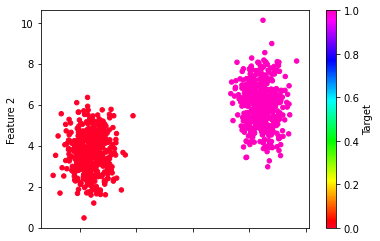

In [2]:
# Generat dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

#creating a DataFrame with dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

#Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="gist_rainbow")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))


In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8628 - accuracy: 0.3040
Epoch 2/100
24/24 [==============================] - 0s 913us/step - loss: 0.8398 - accuracy: 0.3107
Epoch 3/100
24/24 [==============================] - 0s 870us/step - loss: 0.8192 - accuracy: 0.3227
Epoch 4/100
24/24 [==============================] - 0s 934us/step - loss: 0.8009 - accuracy: 0.3373
Epoch 5/100
24/24 [==============================] - 0s 913us/step - loss: 0.7848 - accuracy: 0.3520
Epoch 6/100
24/24 [==============================] - 0s 913us/step - loss: 0.7705 - accuracy: 0.3640
Epoch 7/100
24/24 [==============================] - 0s 913us/step - loss: 0.7579 - accuracy: 0.3827
Epoch 8/100
24/24 [==============================] - 0s 957us/step - loss: 0.7470 - accuracy: 0.4000
Epoch 9/100
24/24 [==============================] - 0s 957us/step - loss: 0.7368 - accuracy: 0.4133
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7280 - accuracy: 

24/24 [==============================] - 0s 1ms/step - loss: 0.1252 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1228 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1205 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 957us/step - loss: 0.1161 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 913us/step - loss: 0.1079 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 957us/step - loss: 0.1060 - accuracy: 1.0000
Epoch 9

<AxesSubplot:>

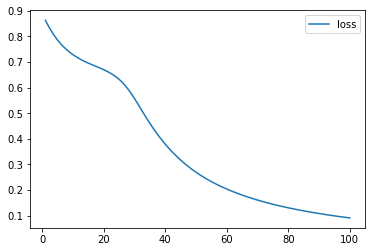

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

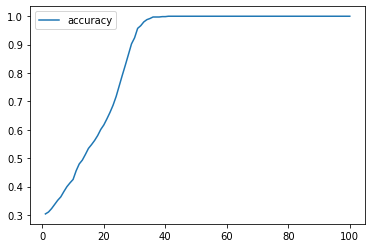

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0934 - accuracy: 1.0000 - 140ms/epoch - 17ms/step
Loss: 0.09340624511241913, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

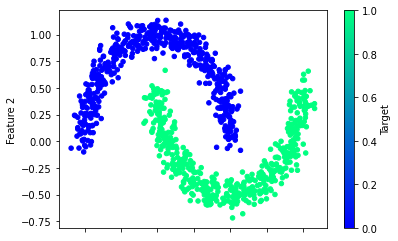

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [18]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [19]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6634 - accuracy: 0.6667
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.6840
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5742 - accuracy: 0.6987
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5439 - accuracy: 0.7107
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7213
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4983 - accuracy: 0.7320
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7440
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.7560
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.7600
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.7680
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2617 - accuracy: 0.8933
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2615 - accuracy: 0.8933
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2613 - accuracy: 0.8947
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2611 - accuracy: 0.8947
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2609 - accuracy: 0.8947
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2607 - accuracy: 0.8933
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2606 - accuracy: 0.8933
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.8933
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2601 - accuracy: 0.8920
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2600 - accuracy: 0.8920
Epoch 93/100


<AxesSubplot:>

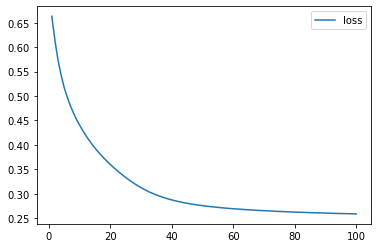

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

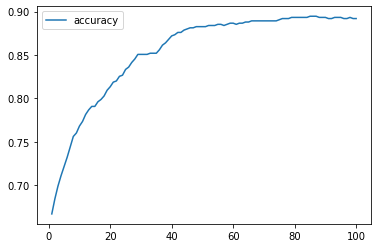

In [21]:
#Plot the accuracy
history_df.plot(y="accuracy")

In [23]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [24]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [25]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7013 - accuracy: 0.4400
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.4827
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6357 - accuracy: 0.5080
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.5493
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5812 - accuracy: 0.5773
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5571 - accuracy: 0.6133
Epoch 7/100
24/24 [==============================] - 0s 957us/step - loss: 0.5345 - accuracy: 0.6440
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.6787
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.7213
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.7507
Epoch 1

24/24 [==============================] - 0s 870us/step - loss: 0.1706 - accuracy: 0.9320
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1689 - accuracy: 0.9320
Epoch 84/100
24/24 [==============================] - 0s 913us/step - loss: 0.1674 - accuracy: 0.9333
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1658 - accuracy: 0.9333
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1641 - accuracy: 0.9347
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1624 - accuracy: 0.9360
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1608 - accuracy: 0.9373
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1592 - accuracy: 0.9373
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.9373
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1560 - accuracy: 0.9373
Epoch 92/